In [1]:
import numpy as np

In [2]:
import os

In [3]:
import matplotlib.pyplot as plt
% matplotlib inline

In [4]:
from keras.layers import Input
from keras.layers import concatenate, add
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.core import Flatten, Dense
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from keras.models import Model
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta


Using TensorFlow backend.


In [5]:
import pandas as pd

In [6]:
from data_loaders import get_n_iterations, data_generator, metadata_generator

In [7]:
from data_files import get_train_validation_test_files, get_multi_data_files

In [10]:
#IRON_HIDE
train_test_folder = os.path.join("/data", "km3net", "Xy_multi_data_files", "train_test_files","numu_nue_stratified_labels")

In [9]:
#UNISA
train_test_folder = 'Xy_multi_data_files_logE/train_test_files/numu_nue_stratified_labels/'

In [11]:
fnames_train, fnames_val, fnames_test, index_split_files = get_train_validation_test_files(train_test_folder)

In [12]:
predict_steps, tot_test_events = get_n_iterations(fnames_test, batch_size=64)

In [13]:
print(predict_steps, tot_test_events)

810 51818


In [14]:
import keras

In [15]:
multi_files_paths = get_multi_data_files("/data/km3net/Xy_multi_data_files/")

multi_files_paths = get_multi_data_files('aafiles/Jpp_v6_aa_files/Xy_multi_data_files/')

In [16]:
from keras import backend as K

def get_TZ_XY(X):
    TZ = np.sum(X, axis=(2, 3))
    XY = np.sum(X, axis = (1,4))
    if K.image_data_format() == "channels_first":
        TZ = TZ[:, np.newaxis, ...]
        XY = XY[:, np.newaxis, ...]
    else:
        TZ = TZ[..., np.newaxis]
        XY = XY[..., np.newaxis]
    return [TZ, XY]

test_data_generator = data_generator(fnames_test, batch_size=64, fdata=get_TZ_XY)
metadata_keylist = ['E', 'posx', 'posy', 'posz', 'dirx', 'diry', 'dirz', 'dist']
metadata_gen = metadata_generator(index_split_files, multi_files_paths, metadata_keylist)

In [17]:
from network_models import TZXY_numu_nue_classification
model = TZXY_numu_nue_classification(2)
#model = keras.models.load_model('./model/net_logE_shallow_relu_tanh_linear_64_100_regression_logE.hdf5')
model.load_weights('./model/numu_nue_classification/tzxy_numu_nue_net_v2_weights_training_numu_nue_classification.hdf5')

OSError: Unable to open file (Unable to open file: name = './model/numu_nue_classification/tzxy_numu_nue_net_v2_weights_training_numu_nue_classification.hdf5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

In [18]:
from network_models import TZXY_numu_nue_classification
model = TZXY_numu_nue_classification(2)
model.load_weights('./model/numu_nue_classification/tzxy_numu_nue_net_v1_weights_training_numu_nue_classification.hdf5')

In [19]:
from network_models import inference_step

In [20]:
metadata, y_true, y_pred, probs = inference_step(model, test_data_generator, predict_steps, 
                                          metadata_gen)

100%|██████████| 810/810 [03:10<00:00,  4.24it/s]


In [21]:
y_true.shape

(51818,)

In [22]:
y_pred.shape

(51818,)

In [23]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred)
print(accuracy)

0.928673433942


In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true, y_pred)
print(confmat)

[[20912   580]
 [ 3116 27210]]


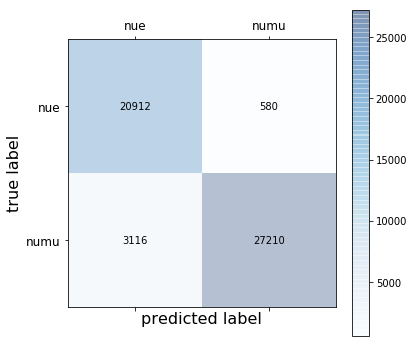

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
	for j in range(confmat.shape[1]):
		ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label',size=16)
plt.ylabel('true label',size=16)
ax.set_xticklabels([''] + ["nue", "numu"], size=12)
ax.set_yticklabels([''] + ["nue", "numu"], size=12)
fig.colorbar(cax)
plt.show()


In [27]:
confusion_matrix(y_true, y_pred)

array([[20912,   580],
       [ 3116, 27210]])

In [28]:
probs.shape

(51818, 2)

In [29]:
metadata

,E,posx,posy,posz,dirx,diry,dirz,dist,file_evt_index,evt_index
0,5.151250e+03,148.874,18.266,-204.667,0.695440,0.100432,0.711531,250.529145,0,2037
1,2.280210e+03,-294.247,-300.629,-51.423,0.118267,0.037752,0.992264,412.505283,0,1723
2,1.227530e+06,-649.697,276.818,-20.660,0.560446,-0.779207,-0.280601,411.898979,0,1449
3,5.644840e+02,296.694,103.148,-66.745,0.204058,-0.915839,-0.345832,320.942747,0,1557
4,1.987430e+05,-389.672,-588.968,453.233,0.832353,0.294585,-0.469476,446.268442,0,1008
5,9.474970e+03,-62.038,-98.563,-307.469,0.507640,0.241117,-0.827142,261.676735,0,2111
6,8.916460e+02,-179.084,-188.555,81.570,-0.197147,0.327520,-0.924048,252.803534,0,312
7,1.830970e+02,118.071,-350.659,-158.563,-0.934963,0.229431,0.270566,327.731095,0,1536
8,1.138800e+04,301.674,74.226,-405.932,0.074698,0.650489,0.755833,453.433227,0,626
9,9.183130e+03,273.884,297.142,-51.406,0.182618,-0.951285,0.248410,325.141888,0,2148


In [30]:
import matplotlib.pyplot as plt

In [31]:
mismatches = np.argwhere(y_pred!=y_true).ravel()

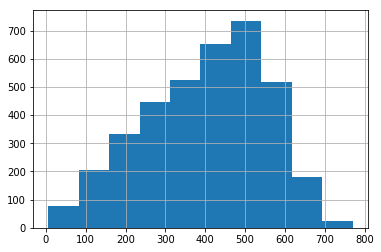

In [32]:
metadata.iloc[mismatches]["dist"].hist()

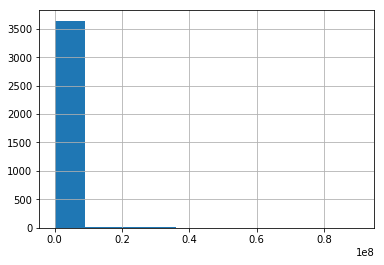

In [33]:
metadata.iloc[mismatches]["E"].hist()

In [34]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from keras.utils import to_categorical

In [35]:
n_classes = 2
fpr = dict()
tpr=dict()
roc_auc=dict()
Y_true = to_categorical(y_true)
for i in range(n_classes):
    fpr[i], tpr[i], threshold = roc_curve(Y_true[:,i], probs[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(threshold.shape)
fpr["micro"], tpr["micro"], _ = roc_curve(y_true, y_pred)
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

(6252,)
(8141,)


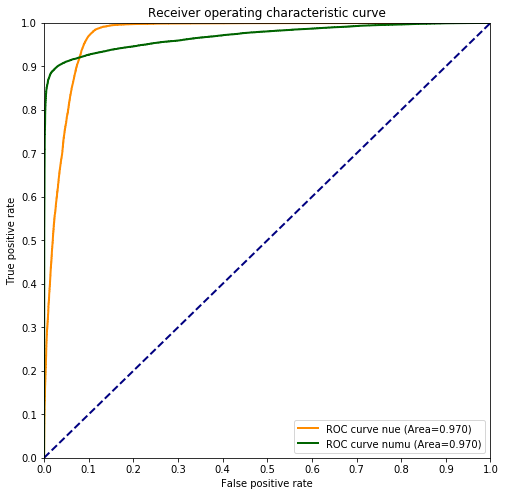

In [36]:
plt.figure(figsize=(8, 8))
lw = 2
plt.plot(fpr[0], tpr[0], color="darkorange",
         lw=lw, label="ROC curve nue (Area=%0.3f)" % roc_auc[0])
plt.plot(fpr[1], tpr[1], color="darkgreen",
         lw=lw, label="ROC curve numu (Area=%0.3f)" % roc_auc[1])

plt.plot([0,1],[0,1], color="navy", lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.00])
plt.yticks(np.arange(0,1.1,0.1))
plt.xticks(np.arange(0,1.1,0.1))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating characteristic curve")
plt.legend(loc="lower right")
plt.show()


In [37]:
from sklearn.metrics import recall_score, precision_score, precision_recall_curve

In [38]:
from sklearn.metrics import average_precision_score

In [39]:
precision_score(y_true, y_pred)

0.97912918315940989

In [40]:
recall_score(y_true, y_pred)

0.89724988458748267

In [41]:
average_precision = average_precision_score(y_true, y_pred)

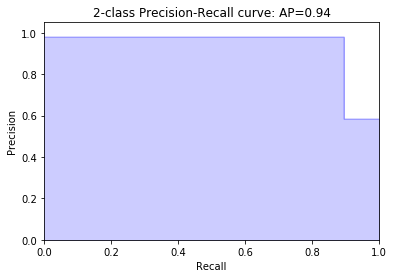

In [42]:
precision, recall, _ = precision_recall_curve(y_true, y_pred)
plt.step(recall, precision, color="b", alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title("2-class Precision-Recall curve: AP={0:0.2f}".format(average_precision))

plt.show()

### efficiency plots

In [43]:
match_indices = np.where(y_true==y_pred)[0]

In [98]:
def efficiency(metadata, target_key, match_indices, logscale=False, nbins=12, xlabel=""):
    fig, axis = plt.subplots()
        
    metadata_arr = metadata[target_key]
    well_classified_evts_metadata = metadata.iloc[match_indices][target_key]
    
    if logscale:
        metadata_arr = np.log10(metadata_arr)
        well_classified_evts_metadata = np.log10(well_classified_evts_metadata)
        
    r_min, r_max = (metadata_arr.min(), metadata_arr.max())
    binned_var, bins_to_plot = np.histogram(metadata_arr, bins=nbins, 
                                             range = (2, r_max-0.2))
    binned_well_cls, _ = np.histogram(well_classified_evts_metadata, bins = nbins, 
                                     range= (2,r_max-0.2))
    efficiency = np.true_divide(binned_well_cls, binned_var)
    
    axis.plot(bins_to_plot[:-1], efficiency)
    axis.grid()
    axis.set_xlabel(xlabel)
    axis.set_ylabel("well_classified / total test events", size=12)
    axis.set_xlim([2, 8])
    axis.set_ylim([0.7, 1.0])
    axis.set_title("Classification efficiency")
    print(efficiency)
    

[ 0.90834846  0.93119773  0.9408388   0.94458201  0.9405254   0.92236422
  0.91562644  0.91746248  0.91761223  0.91680961  0.93557423  0.93660532]


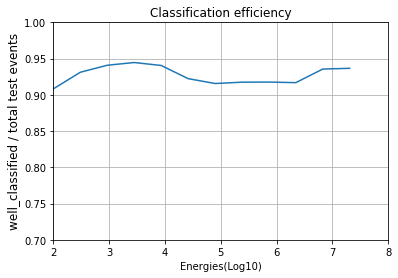

In [99]:
efficiency(metadata, "E", match_indices, logscale=True, xlabel="Energies(Log10)")

In [72]:
def efficiency(metadata, target_key, match_indices, logscale=False, nbins=20, xlabel=""):
    fig, axis = plt.subplots()
        
    metadata_arr = metadata[target_key]
    well_classified_evts_metadata = metadata.iloc[match_indices][target_key]
    
    if logscale:
        metadata_arr = np.log10(metadata_arr)
        well_classified_evts_metadata = np.log10(well_classified_evts_metadata)
        
    r_min, r_max = (metadata_arr.min(), metadata_arr.max())
    binned_var, bins_to_plot = np.histogram(metadata_arr, bins=nbins, 
                                             range = (r_min, r_max-20))
    binned_well_cls, _ = np.histogram(well_classified_evts_metadata, bins = nbins, 
                                     range= (r_min, r_max-20))
    efficiency = np.true_divide(binned_well_cls, binned_var)
    
    axis.plot(bins_to_plot[:-1], efficiency)
    axis.grid()
    axis.set_xlabel(xlabel)
    axis.set_ylabel("well_classified / total test events", size=12)
    axis.set_xlim([r_min, r_max])
    axis.set_ylim([0.7, 1.0])
    axis.set_title("Classification efficiency")
    

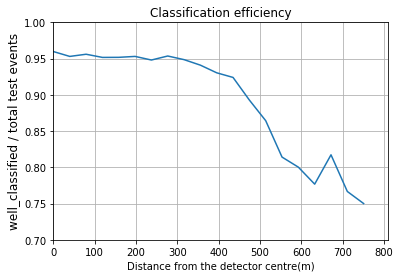

In [73]:
efficiency(metadata, "dist", match_indices, logscale=False, xlabel="Distance from the detector centre(m)")

In [43]:
def energy_maps(energies, nbins = 5):
    
    log_energies = np.log10(energies)
    
    E_maps = []
    binned, energy_bins = np.histogram(log_energies,bins=[log_energies.min(), 2.5, 3, 4, 5.5, log_energies.max()])#, 
                                  #range=(log_energies.min(), log_energies.max()))
    for i, E in enumerate(zip(energy_bins[:-1], energy_bins[1:])):
        lowE, highE = E
        E_maps.append((i, np.where(np.logical_and(log_energies>=lowE, log_energies<highE))[0]))
    return E_maps, energy_bins

In [44]:
E_maps, E_bins = energy_maps(metadata["E"])
print(E_bins)

[-1.23781151  2.5         3.          4.          5.5         7.99156097]


In [45]:
for i in range(len(E_maps)):
    print(len(E_maps[i][1]))

3130
6719
17571
17790
6607


In [46]:
def distance_maps(distances, nbins = 5):
    
    d_maps = []
    binned, dist_bins = np.histogram(distances,bins=[6.13e-01, 170, 320, 450, 500, 8.106e+02])#, 
                                  #range=(log_energies.min(), log_energies.max()))
    for i, d in enumerate(zip(dist_bins[:-1],dist_bins[1:])):
        lowd, highd = d
        d_maps.append((i, np.where(np.logical_and(distances>=lowd, distances<highd))[0]))
    return d_maps, dist_bins

In [47]:
d_maps, dist_bins = distance_maps(metadata["dist"])

In [48]:
for i in range(len(d_maps)):
    print(len(d_maps[i][1]))

7017
16205
16495
5266
6833


In [49]:
for bin in dist_bins:
    print(np.int(bin))

0
170
320
450
500
810


### ROC function

In [53]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from keras.utils import to_categorical


def roc_function(E_map_list, E_bins, y_true, y_pred, probs, var, y_n_classes = 2):
    Y_true = to_categorical(y_true)
    n_classes = 2
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    plt.figure(figsize=(10, 7))
    plt.grid()
    color_list = ["red", "blue", "green", "orange", "magenta", "brown", "black"]
    
    for em in range(len(E_map_list)):
        E_map = E_map_list[em][1]
    
        for i, ls in zip(range(n_classes-1), ['-', '--']):
            fpr[i], tpr[i], _ = roc_curve(Y_true[E_map][:,i], probs[E_map][:,i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            lw = 1.5
            
            plt.plot(fpr[i], tpr[i], color=color_list[em], linestyle=ls,
                     lw=lw, label="ROC curve {} E_bin:[{:.1f},{:.1f}] class {} (Area={:.3f})".format(var, E_bins[em], 
                                                                                                      E_bins[em+1], 
                                                                                                  i, roc_auc[i]))
            
            plt.plot([0,1],[0,1], color="navy", lw=lw, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.01])
            plt.xlabel("False positive rate", size=12)
            plt.ylabel("True positive rate", size=12)
            plt.title("Receiver operating characteristic curve")
            plt.legend(loc="lower right")
            
        
        fpr["micro"], tpr["micro"], _ = roc_curve(y_true[E_map], y_pred[E_map])
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
 
    return


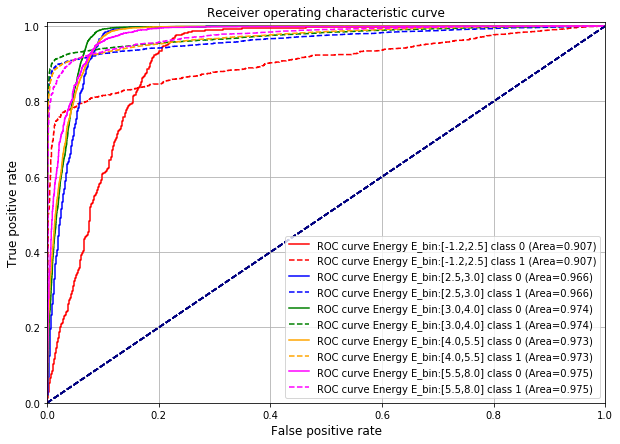

In [52]:
roc_function(E_maps, E_bins, y_true, y_pred, probs, "Energy" )

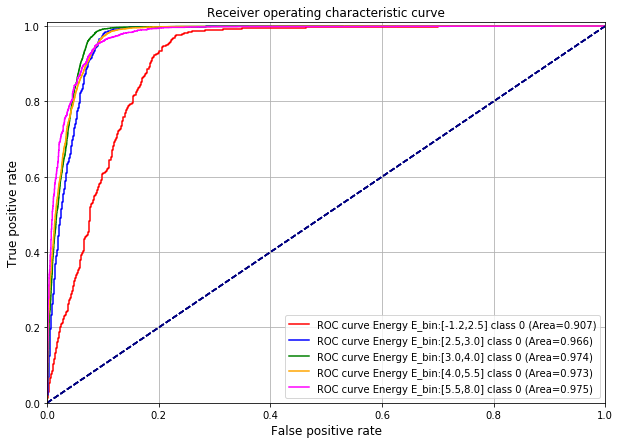

In [55]:
roc_function(E_maps, E_bins, y_true, y_pred, probs, "Energy" )

In [56]:
d_bins = [0.5, 170, 320, 450, 500, 810]

In [59]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from keras.utils import to_categorical


def roc_function(E_map_list, E_bins, y_true, y_pred, probs, var, y_n_classes = 2):
    Y_true = to_categorical(y_true)
    n_classes = 2
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    plt.figure(figsize=(10, 7))
    plt.grid()
    color_list = ["red", "blue", "green", "orange", "magenta", "brown", "black"]
    
    for em in range(len(E_map_list)):
        E_map = E_map_list[em][1]
    
        for i, ls in zip(range(n_classes-1), ['-', '--']):
            fpr[i], tpr[i], _ = roc_curve(Y_true[E_map][:,i], probs[E_map][:,i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            lw = 1.5
            
            plt.plot(fpr[i], tpr[i], color=color_list[em], linestyle=ls,
                     lw=lw, label="ROC curve {} d_bin:[{},{}] class {} (Area={:.3f})".format(var, E_bins[em], 
                                                                                                      E_bins[em+1], 
                                                                                                  i, roc_auc[i]))
            
            plt.plot([0,1],[0,1], color="navy", lw=lw, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.01])
            plt.xlabel("False positive rate", size=12)
            plt.ylabel("True positive rate", size=12)
            plt.title("Receiver operating characteristic curve")
            plt.legend(loc="lower right")
            
        
        fpr["micro"], tpr["micro"], _ = roc_curve(y_true[E_map], y_pred[E_map])
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
 
    return


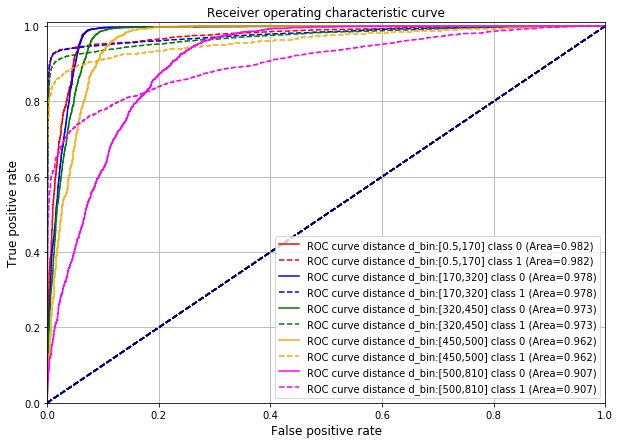

In [58]:
roc_function(d_maps, d_bins, y_true, y_pred, probs, "distance" )

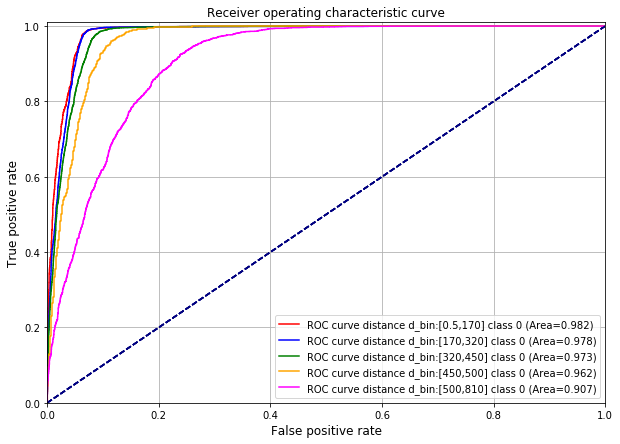

In [61]:
roc_function(d_maps, d_bins, y_true, y_pred, probs, "distance" )

### multi slice efficiency plots to be done

In [ ]:
def efficiency(metadata, target_key, match_indices, logscale=False, nbins=12, xlabel=""):
    fig, axis = plt.subplots()
        
    metadata_arr = metadata[target_key]
    well_classified_evts_metadata = metadata.iloc[match_indices][target_key]
    
    if logscale:
        metadata_arr = np.log10(metadata_arr)
        well_classified_evts_metadata = np.log10(well_classified_evts_metadata)
        
    r_min, r_max = (metadata_arr.min(), metadata_arr.max())
    binned_var, bins_to_plot = np.histogram(metadata_arr, bins=nbins, 
                                             range = (r_min, r_max))
    binned_well_cls, _ = np.histogram(well_classified_evts_metadata, bins = nbins, 
                                     range= (r_min, r_max))
    efficiency = np.true_divide(binned_well_cls, binned_var)
    
    axis.plot(bins_to_plot[:-1], efficiency)
    axis.grid()
    axis.set_xlabel(xlabel)
    axis.set_ylabel("well_classified / total test events", size=12)
    axis.set_xlim([r_min, r_max])
    axis.set_ylim([0.0, 1.0])
    axis.set_title("Classification efficiency")
    

In [70]:
from keras.utils import plot_model

In [71]:
plot_model(model, to_file="numu_nue_model.png", show_shapes=True)
plot_model(model, to_file="numu_nue_model_noshapes.png", show_shapes=False)

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

In [1]:
import keras

Using TensorFlow backend.


In [2]:
#load history

In [ ]:
np.load(
    #to be done on UNISA computer

In [ ]:
./model/numu_nue_classification/tzxy_numu_nue_net_v2_weights_training_numu_nue_classification.hdf5'

### plot TZ, XY views

In [15]:
fname = fnames_train[0]

In [16]:
np.load(fname).keys()

['y', 'x']

In [17]:
X = np.load(fname)["x"]
y = np.load(fname)["y"]

In [18]:
np.sum(X, axis=((2,3,4))).shape

(1623, 75)

In [19]:
metadata_numu = np.load(multi_files_paths[0][0])
metadata_nue = np.load(multi_files_paths[0][1])

NameError: name 'multi_files_paths' is not defined

In [ ]:
train_indx = np.load(index_split_files[0])["train"]

In [ ]:
E_numu = train_indx[train_indx<metadata_numu["E"].shape[0]]

In [ ]:
E_nue = train_indx[train_indx>metadata_numu["E"].shape[0]]

In [20]:
plt.figure(figsize=(8,8))
plt.step(range(75))
plt.ylim(0,8)
plt.title("Discretised times histogram")
plt.xlabel("Discretised time index")
plt.ylabel("number of hits")

TypeError: step() missing 1 required positional argument: 'y'

In [21]:
def get_TZ(X):
    TZ = np.sum(X, axis=(2,3))
    return TZ
def get_XY(X):
    XY = np.sum(X, axis=(1,4))
    return XY

In [22]:
TZ = get_TZ(X)
XY = get_XY(X)
ZT = np.swapaxes(TZ, axis1=1, axis2=2)

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
print(TZ[0].shape, XY[0].shape, ZT[0].shape)

(75, 18) (16, 15) (18, 75)


In [25]:
nue = np.where(y==0)[0]
print(nue)
numu = np.where(y==1)[0]
print(numu)

[   2    3    5    8    9   12   13   16   20   22   24   26   28   29   34
   35   38   39   43   47   48   49   50   54   58   59   63   65   69   72
   73   78   81   82   84   86   88   90   95   96  103  106  108  110  111
  113  114  119  126  129  130  131  133  134  136  138  139  141  143  145
  154  155  156  157  159  160  161  167  168  169  170  173  177  180  181
  184  187  190  191  192  193  195  196  197  201  205  207  209  211  213
  215  219  220  221  222  223  224  228  230  231  232  234  235  238  241
  242  243  245  247  249  250  251  256  259  264  268  269  273  274  275
  276  280  283  285  290  291  292  293  298  301  304  305  306  307  309
  310  312  316  317  320  323  325  326  327  330  331  334  335  336  337
  339  340  341  342  343  344  345  346  357  359  362  363  364  366  367
  368  369  372  374  376  377  378  379  381  382  385  386  391  392  393
  394  399  403  404  405  411  412  413  417  425  426  427  431  436  445
  447  448  

In [26]:
nue.shape

(682,)

In [27]:
numu.shape

(941,)

In [28]:
E_numu.shape

NameError: name 'E_numu' is not defined

In [29]:
E_nue.shape

NameError: name 'E_nue' is not defined

In [30]:
y.shape

(1623,)

In [31]:
np.int(numu.shape[0]+nue.shape[0])

1623

In [32]:
evt = numu[-1]

NameError: name 'E_numu' is not defined

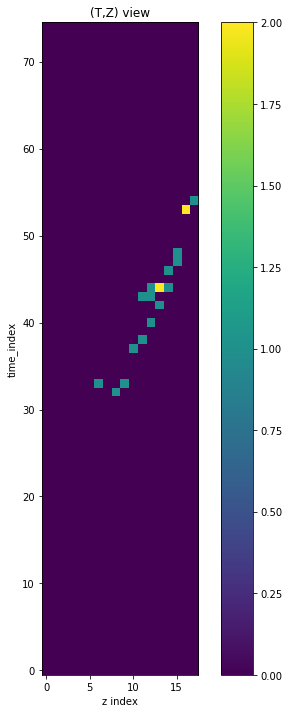

In [33]:
plt.figure(figsize=(8, 12))
plt.imshow(TZ[evt], origin="lower")
plt.colorbar()
plt.xlabel("z index")
plt.ylabel("time_index")
plt.title("(T,Z) view")
print(y[evt], E_numu[-1])


NameError: name 'E_numu' is not defined

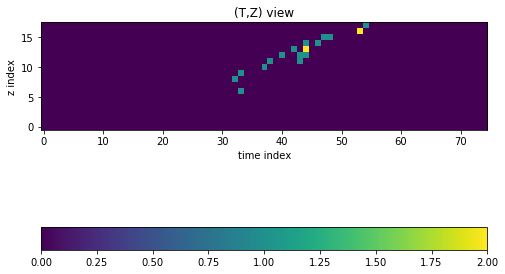

In [34]:
plt.figure(figsize=(8, 12))
plt.imshow(ZT[evt], origin="lower")
plt.colorbar(orientation="horizontal")
plt.xlabel("time index")
plt.ylabel("z index")
plt.title("(T,Z) view")
print(y[evt], E_numu[-1])


In [35]:
evt=nue[2]

NameError: name 'E_nue' is not defined

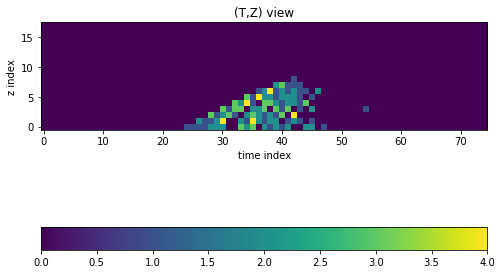

In [36]:
plt.figure(figsize=(8, 12))
plt.imshow(ZT[evt], origin="lower")
plt.colorbar(orientation="horizontal")
plt.xlabel("time index")
plt.ylabel("z index")
plt.title("(T,Z) view")
print(y[evt], E_nue[2])


In [39]:
ZT.shape

(1623, 18, 75)

In [37]:
from keras.models import Sequential
from keras.layers.pooling import AveragePooling2D

In [68]:
model = Sequential()
model.add(AveragePooling2D(pool_size=2, input_shape =(18,75,1)))

In [69]:
ZT[2].shape

(18, 75)

In [70]:
example = ZT[2]

In [71]:
example = example[np.newaxis, ...,np.newaxis]

In [72]:
example.shape

(1, 18, 75, 1)

In [73]:
pooled = model.predict([example])

In [74]:
pooled.shape

(1, 9, 37, 1)

In [75]:
pooled = pooled.reshape(9,37)

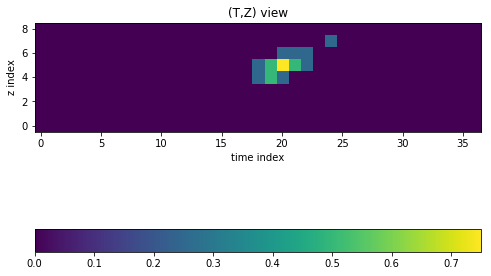

In [77]:

plt.figure(figsize=(8, 12))
plt.imshow(pooled, origin="lower")
plt.colorbar(orientation="horizontal")
plt.xlabel("time index")
plt.ylabel("z index")
plt.title("(T,Z) view")

0 2506


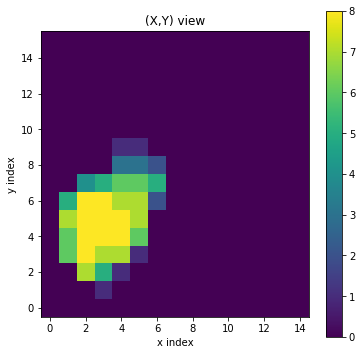

In [72]:
plt.figure(figsize=(6, 6))
plt.imshow(XY[evt], origin="lower")
plt.colorbar()
plt.xlabel("x index")
plt.ylabel("y index")
plt.title("(X,Y) view")
print(y[evt],E_nue[2])

In [65]:
import numpy as np

In [66]:
history = np.load("./model/numu_nue_classification/tzxy_numu_nue_net_v1_history_numu_nue_classification.pkl")

In [70]:
# %load history_plot
import matplotlib
matplotlib.pyplot.switch_backend('agg')
import matplotlib.pyplot as plt

def history_plot(history, name, flag):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(history['loss'])
    plt.ylim([0.14, 0.3])
    if 'val_loss' in history:
        plt.plot(history['val_loss'])
    plt.grid()
    plt.legend(['Training', 'Validation'])
    if flag=="save":
        plt.savefig("./plots/Loss_"+name+".png")
    elif (flag=="show"):
        plt.show()
    elif (flag=="both"):
        plt.savefig("./plots/Loss_"+name+".png")
        plt.show()
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(history['acc'])
    plt.ylim([0.7, 1.0])
    if 'val_acc' in history:
        plt.plot(history['val_acc'])
    plt.grid()
    plt.legend(['Training', 'Validation'], loc='lower right')
    if flag=="save":
        plt.savefig("./plots/Accuracy_"+name+".png")
    elif (flag=="show"):
        plt.show()
    elif (flag=="both"):
        plt.savefig("./plots/Accuracy_"+name+".png")
        plt.show()

COLORS = ['red', 'blue', 'green', 'orange', 'purple']
        


In [71]:
%matplotlib inline

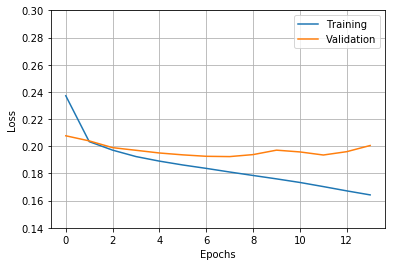

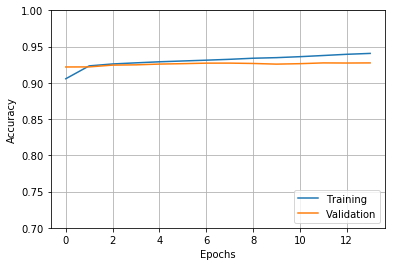

In [72]:
history_plot(history, "numu_nue_classification_history", "both")